In [2]:
import pandas as pd
from tqdm import tqdm
from copy import copy
import statsmodels.api as sm

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_parquet('../../data/curated/clean_stats_13-22.parquet')

In [4]:
data.columns[17:27]

Index(['player_team', 'is_captain', 'player_position_defender',
       'player_position_rover', 'player_position_key_defender',
       'player_position_key_forward', 'player_position_forward',
       'player_position_INT', 'player_position_ruck', 'player_position_sub'],
      dtype='object')

In [5]:
data.columns[77:123]

Index(['spoils', 'rating_points', 'winning_margin', 'won_match', '30_and_2',
       'high_goal_scorer', 'kicks_proportion', 'marks_proportion',
       'handballs_proportion', 'disposals_proportion',
       'effective_disposals_proportion', 'goals_proportion',
       'afl_fantasy_score_proportion', 'SC_proportion', 'behinds_proportion',
       'hitouts_proportion', 'tackles_proportion', 'rebounds_proportion',
       'inside_fifties_proportion', 'clearances_proportion',
       'clangers_proportion', 'free_kicks_for_proportion',
       'free_kicks_against_proportion', 'contested_possessions_proportion',
       'uncontested_possessions_proportion', 'contested_marks_proportion',
       'marks_inside_fifty_proportion', 'one_percenters_proportion',
       'goal_assists_proportion', 'centre_clearances_proportion',
       'stoppage_clearances_proportion', 'score_involvements_proportion',
       'metres_gained_proportion', 'turnovers_proportion',
       'intercepts_proportion', 'tackles_inside_f

In [6]:
data.columns[164:]

Index(['spoils_total', 'coaches_votes', 'average_votes_prev',
       'brownlow_votes'],
      dtype='object')

In [16]:
features = [
    'rating_points',
    


    'player_position_defender', 'player_position_rover',
    'player_position_key_defender', 'player_position_key_forward',
    'player_position_forward', 
    'player_position_ruck', 'player_position_wing',

    'is_captain',
    'winning_margin', 'won_match',
    '30_and_2', 'high_goal_scorer',
    # given some games have no bounces, 
    # proportions could not be calculated, hence include regular stat as feature
    'bounces',
    'kicks_proportion', 'marks_proportion', 'handballs_proportion',
    'disposals_proportion', 'effective_disposals_proportion', 'afl_fantasy_score_proportion', 'SC_proportion',
    'goals_proportion', 'behinds_proportion', 'hitouts_proportion',
    'tackles_proportion', 'rebounds_proportion',
    'inside_fifties_proportion', 'clearances_proportion',
    'clangers_proportion', 'free_kicks_for_proportion',
    'free_kicks_against_proportion', 'contested_possessions_proportion',
    'uncontested_possessions_proportion', 'contested_marks_proportion',
    'marks_inside_fifty_proportion', 'one_percenters_proportion',
    'goal_assists_proportion',
    'centre_clearances_proportion', 'stoppage_clearances_proportion',
    'score_involvements_proportion', 'metres_gained_proportion',
    'turnovers_proportion', 'intercepts_proportion',
    'tackles_inside_fifty_proportion',
    'contest_def_one_on_ones_proportion',
    'contest_off_one_on_ones_proportion',
    'def_half_pressure_acts_proportion', 'effective_kicks_proportion',
    'f50_ground_ball_gets_proportion', 'ground_ball_gets_proportion',
    'hitouts_to_advantage_proportion', 'hitout_win_percentage_proportion',
    'intercept_marks_proportion',
    'shots_at_goal_proportion',
    'spoils_proportion', 
    'coaches_votes', 'average_votes_prev'
]
target = 'brownlow_votes'

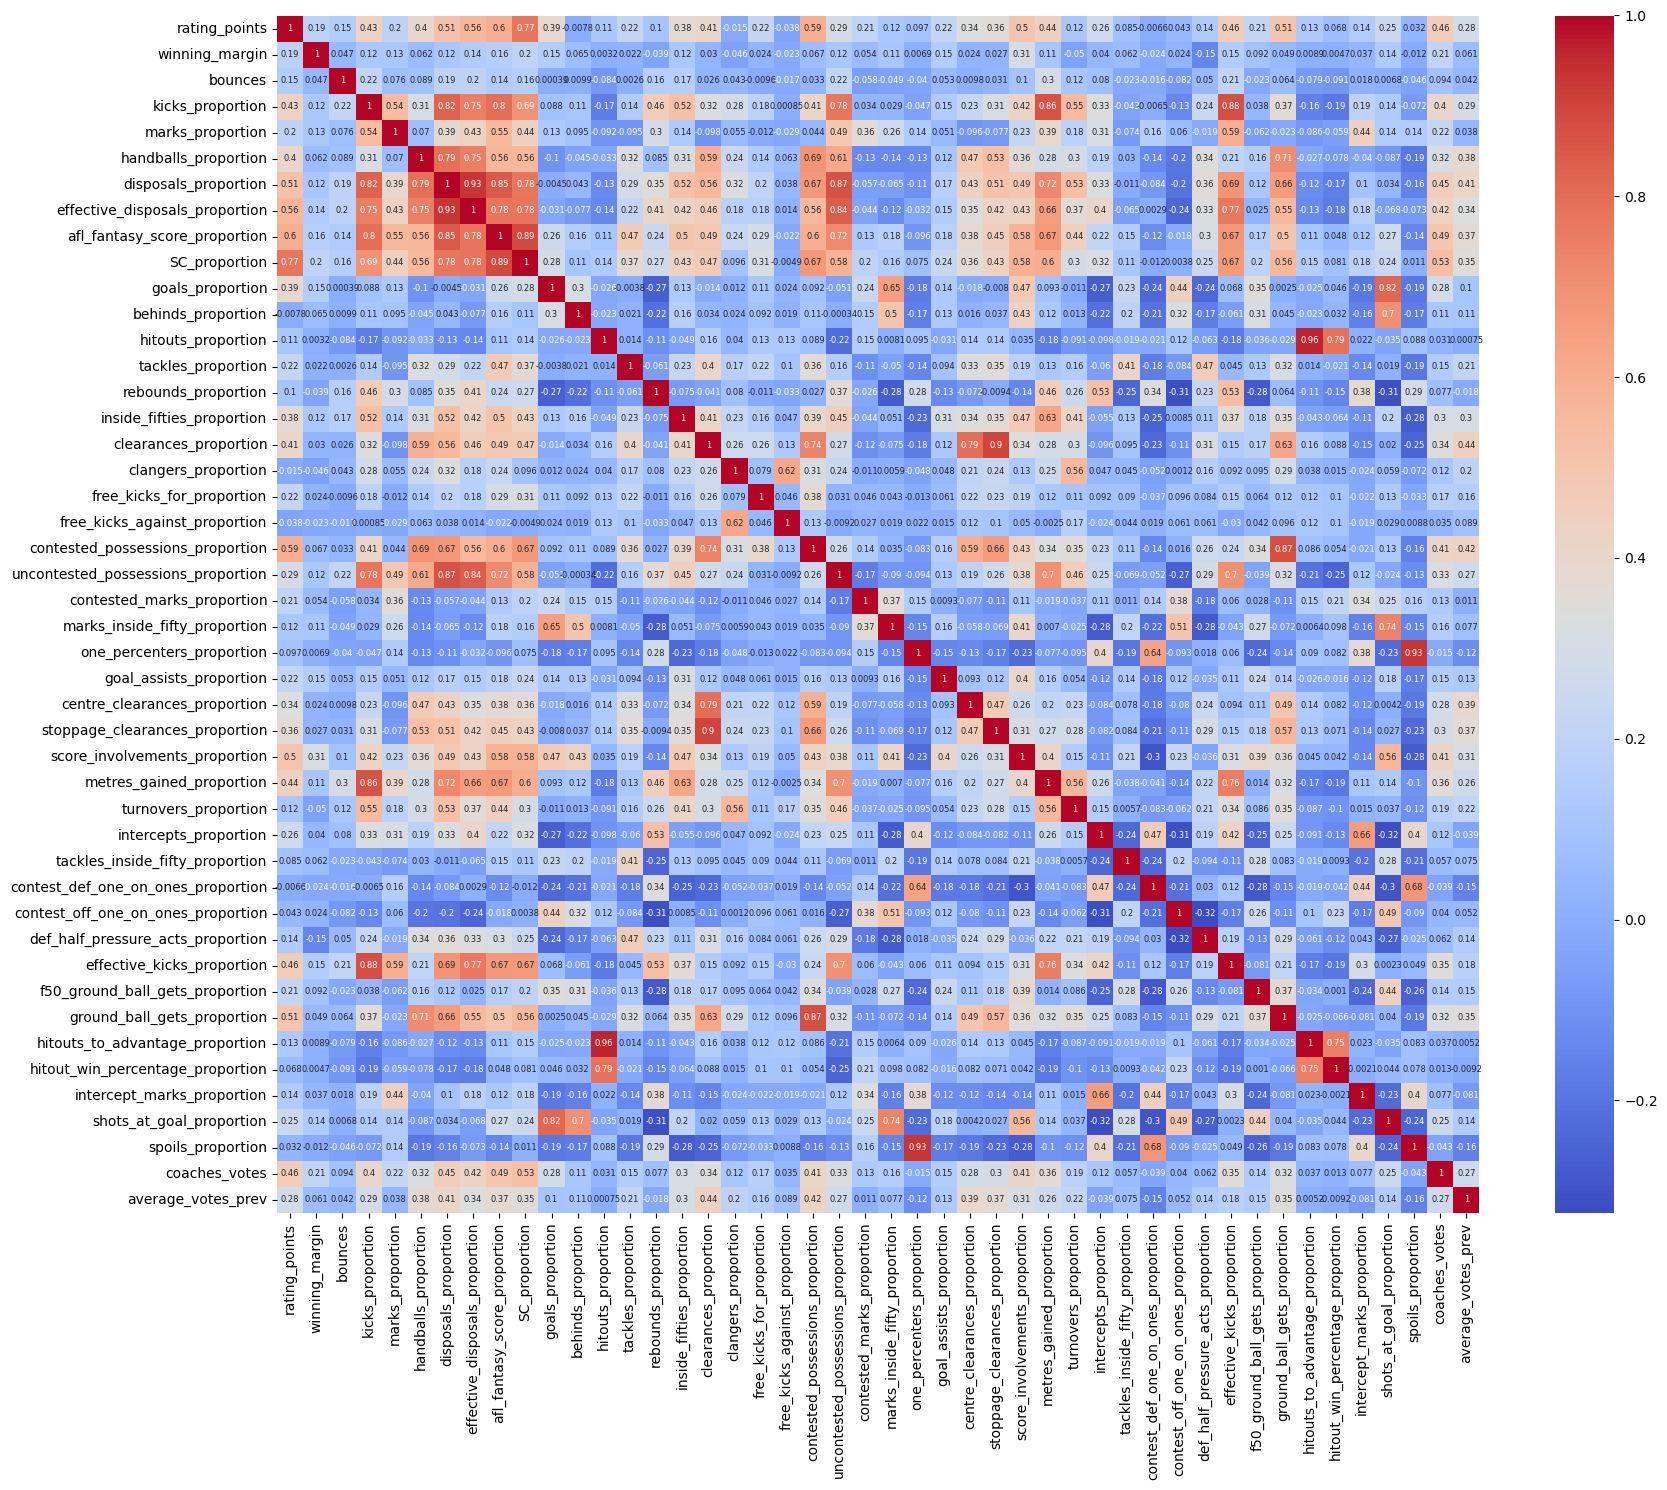

In [17]:
binary_features = ['is_captain', 'won_match', '30_and_2', 'high_goal_scorer', 'player_position_defender', 'player_position_rover',
       'player_position_key_defender', 'player_position_key_forward',
       'player_position_forward', 'player_position_INT',
       'player_position_ruck', 'player_position_sub', 'player_position_wing']

correlation_matrix = data[[e for e in features if e not in binary_features]].corr()

plt.subplots(figsize=(18, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm',
            annot=True, annot_kws={"size": 6})


plt.tight_layout()
plt.show()

In [18]:
X_train, y_train = data.query('season < 2022')[features], data.query('season < 2022')[target]

In [19]:
model = sm.MNLogit(y_train, sm.add_constant(X_train))

In [20]:
result = model.fit(maxiter=10_000)

Optimization terminated successfully.
         Current function value: 0.161647
         Iterations 13


In [21]:
# baseline model aic
result.aic

24978.813783516678

In [22]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:         brownlow_votes   No. Observations:                76187
Model:                        MNLogit   Df Residuals:                    76013
Method:                           MLE   Df Model:                          171
Date:                Mon, 25 Sep 2023   Pseudo R-squ.:                  0.4998
Time:                        18:28:02   Log-Likelihood:                -12315.
converged:                       True   LL-Null:                       -24620.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================
                  brownlow_votes=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                -11.2502      0.226    -49.821      0.000     -11.693     -10.808
rating_points                          0.0071      0.009      0.808      0.419      -0.010       0.024
player_position_defender              -0.0805      0.140     -0.576      0.564      -0.354       0.193
player_position_rover                  0.3978      0.113      3.526      0.000       0.177       0.619
player_position_key_defender           0.5822      0.191      3.053      0.002       0.208       0.956
player_position_key_forward            0.1712      0.158      1.087      0.277      -0.138       0.480
player_position_forward                0.1835      0.118      1.555      0.120      -0.048       0.415
player_position_ruck                   0.3047      0.331      0.920      0.358      -0.344       0.954
player_position_wing                   0.1358      0.126      1.078      0.281      -0.111       0.383
is_captain                             0.1424      0.098      1.448      0.148      -0.050       0.335
winning_margin                         0.0042      0.001      3.901      0.000       0.002       0.006
won_match                              0.5568      0.093      5.976      0.000       0.374       0.739
30_and_2                              -0.2120      0.215     -0.988      0.323      -0.633       0.209
high_goal_scorer                       1.2766      0.202      6.324      0.000       0.881       1.672
bounces                                0.1040      0.026      4.024      0.000       0.053       0.155
kicks_proportion                      36.3993     24.249      1.501      0.133     -11.129      83.927
marks_proportion                     -22.3169      5.169     -4.317      0.000     -32.448     -12.186
handballs_proportion                  32.8608     16.776      1.959      0.050      -0.019      65.741
disposals_proportion                 -62.8187     46.558     -1.349      0.177    -154.071      28.434
effective_disposals_proportion         1.1712     12.691      0.092      0.926     -23.703      26.046
afl_fantasy_score_proportion         178.0219     26.349      6.756      0.000     126.379     229.664
SC_proportion                          0.1508     11.494      0.013      0.990     -22.376      22.678
goals_proportion                       9.1934      1.671      5.502      0.000       5.918      12.468
behinds_proportion                    -0.8106      1.064     -0.762      0.446      -2.895       1.274
hitouts_proportion                     0.4483      1.522      0.295      0.768      -2.534       3.431
tackles_proportion                   -18.1668      4.372     -4.155      0.000     -26.735      -9.598
rebounds_proportion                    0.4119      1.506      0.273      0.784      -2.541       3.364
inside_fifties_proportion              0.5100      1.908      0.267      0.789      -3.229       4.249
clearances_proportion                  8.2975   

# Feature Selection

Remove features with high correlation to each other

Also remove features that do not seem to predict well based on domain knowledge

In [27]:
potential_features = [
    # 'rating_points',
    'is_captain',
    # 'winning_margin',
    'won_match',
    '30_and_2',
    'high_goal_scorer',
    'bounces',
    'kicks_proportion',
    'marks_proportion',
    'handballs_proportion',
    'disposals_proportion',
    'effective_disposals_proportion',
    'afl_fantasy_score_proportion',
    'SC_proportion',
    'goals_proportion',
    'behinds_proportion',
    'hitouts_proportion',
    'tackles_proportion',
    'rebounds_proportion',
    'inside_fifties_proportion',
    'clearances_proportion',
    'clangers_proportion',
    'free_kicks_for_proportion',
    'free_kicks_against_proportion',
    'contested_possessions_proportion',
    'uncontested_possessions_proportion',
    'contested_marks_proportion',
    'marks_inside_fifty_proportion',
    'one_percenters_proportion',
    'goal_assists_proportion',
    'centre_clearances_proportion',
    'stoppage_clearances_proportion',
    'score_involvements_proportion',
    'metres_gained_proportion',
    'turnovers_proportion',
    'intercepts_proportion',
    'tackles_inside_fifty_proportion',
    'contest_def_one_on_ones_proportion',
    'contest_off_one_on_ones_proportion',
    'def_half_pressure_acts_proportion',
    'effective_kicks_proportion',
    'f50_ground_ball_gets_proportion',
    'ground_ball_gets_proportion',
    'hitouts_to_advantage_proportion',
    'hitout_win_percentage_proportion',
    'intercept_marks_proportion',
    'shots_at_goal_proportion',
    'spoils_proportion',
    'coaches_votes',
    'average_votes_prev',

    'player_position_defender', 'player_position_rover',
       'player_position_key_defender', 'player_position_key_forward',
       'player_position_forward', 
       'player_position_ruck', 'player_position_wing'
]

# Stepwise Selection

Define functions forwards and backward that conduct forward selection and backward selection respectively.

Then iterate through a stepwise selection process until the model AIC no longer decreases.

In [546]:
def forward(current_features, X, y_train, min_aic=10_000_000):
    
    next_feature = None
        
    for f in tqdm(potential_features, desc="Forward Selection"):

        # do not want to add same feature multiple times
        if f not in current_features:
            
            curr_features = list(current_features) + [f]


            # train model with new feature added
            X_train = X[curr_features]
            
            model = sm.MNLogit(y_train, sm.add_constant(X_train)).fit(disp=0)

            # calc aic
            local_aic = model.aic


            if local_aic < min_aic:

                next_feature = f

                min_aic = local_aic  
    
    return (min_aic, next_feature)

In [547]:
def backward(current_features, X, y_train, min_aic=10_000_000):
    
    next_feature = None
        
    for f in tqdm(potential_features, desc="Backward Selection"):

        # do not want to add same feature multiple times
        if f in current_features:
            
            curr_features = list(current_features)
            curr_features.remove(f)


            # train model with new feature added
            X_train = X[curr_features]
            
            model = sm.MNLogit(y_train, sm.add_constant(X_train)).fit(disp=0)

            # calc aic
            local_aic = model.aic


            if local_aic < min_aic:

                next_feature = f

                min_aic = local_aic  
    
    return (min_aic, next_feature)

In [548]:
X = data.query('season < 2022')[potential_features]
y_train = data.query('season < 2022')[target]

In [549]:
# since there are many features, this takes a long time to run.
# features are saved to features.txt for loading 

current_features = []
previous_aic = float('inf')  # Start with a large AIC

while True:
    # Forward selection
    forward_aic, forward_feature = forward(current_features, X, y_train, previous_aic)
    
    # Backward elimination
    backward_aic, backward_feature = backward(current_features, X, y_train, previous_aic)
    
    # Check which method (forward or backward) improves the model more
    if forward_aic < backward_aic and forward_aic < previous_aic:
        current_features.append(forward_feature)
        print(f'added: {forward_feature}\n')
        previous_aic = forward_aic
    elif backward_aic < previous_aic:
        current_features.remove(backward_feature)
        print(f'removed: {backward_feature}\n')
        previous_aic = backward_aic
    else:
        # If no improvement is made, break out of the loop
        print('stepwise selection finished')
        break

Backward Selection: 100%|██████████| 56/56 [00:00<00:00, 57134.77it/s]


added: coaches_votes



Forward Selection:   4%|▎         | 2/56 [00:01<00:43,  1.24it/s]


KeyboardInterrupt: 

In [194]:
current_features

['coaches_votes',
 'afl_fantasy_score_proportion',
 'goals_proportion',
 'average_votes_prev',
 'won_match',
 'contested_possessions_proportion',
 'hitouts_proportion',
 'high_goal_scorer',
 'intercept_marks_proportion',
 'winning_margin',
 'marks_inside_fifty_proportion',
 'bounces',
 'spoils_proportion',
 'ground_ball_gets_proportion',
 'def_half_pressure_acts_proportion',
 '30_and_2',
 'is_captain',
 'metres_gained_proportion',
 'centre_clearances_proportion',
 'clangers_proportion',
 'free_kicks_against_proportion',
 'tackles_proportion',
 'marks_proportion',
 'handballs_proportion',
 'behinds_proportion',
 'contest_off_one_on_ones_proportion',
 'contest_def_one_on_ones_proportion',
 'free_kicks_for_proportion']

In [19]:
# write features to text file to avoid stepwise selection when making changes
with open('stepwise_selection_features.txt', 'w') as f:
    for feature in current_features:
        f.write(f'{feature}\n')

In [24]:
current_features = []
with open('stepwise_selection_features.txt', 'r') as f:
    for feature in f:
        current_features.append(feature.strip())

In [25]:
current_features

['coaches_votes',
 'afl_fantasy_score_proportion',
 'goals_proportion',
 'average_votes_prev',
 'won_match',
 'contested_possessions_proportion',
 'hitouts_proportion',
 'high_goal_scorer',
 'intercept_marks_proportion',
 'winning_margin',
 'marks_inside_fifty_proportion',
 'bounces',
 'spoils_proportion',
 'ground_ball_gets_proportion',
 'def_half_pressure_acts_proportion',
 '30_and_2',
 'is_captain',
 'metres_gained_proportion',
 'centre_clearances_proportion',
 'clangers_proportion',
 'free_kicks_against_proportion',
 'tackles_proportion',
 'marks_proportion',
 'handballs_proportion',
 'behinds_proportion',
 'contest_off_one_on_ones_proportion',
 'contest_def_one_on_ones_proportion',
 'free_kicks_for_proportion']

In [28]:
# features that have been dropped during stepwise selection
dropped_features = set(potential_features) - set(current_features)
dropped_features

{'SC_proportion',
 'clearances_proportion',
 'contested_marks_proportion',
 'disposals_proportion',
 'effective_disposals_proportion',
 'effective_kicks_proportion',
 'f50_ground_ball_gets_proportion',
 'goal_assists_proportion',
 'hitout_win_percentage_proportion',
 'hitouts_to_advantage_proportion',
 'inside_fifties_proportion',
 'intercepts_proportion',
 'kicks_proportion',
 'one_percenters_proportion',
 'player_position_defender',
 'player_position_forward',
 'player_position_key_defender',
 'player_position_key_forward',
 'player_position_rover',
 'player_position_ruck',
 'player_position_wing',
 'rebounds_proportion',
 'score_involvements_proportion',
 'shots_at_goal_proportion',
 'stoppage_clearances_proportion',
 'tackles_inside_fifty_proportion',
 'turnovers_proportion',
 'uncontested_possessions_proportion'}

In [13]:
X_train, y_train = data.query('season < 2022')[current_features], data.query('season < 2022')[target]

In [14]:
model = sm.MNLogit(y_train, sm.add_constant(X_train)).fit_regularized(disp=0)

In [15]:
model.aic

24926.910644167438

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:         brownlow_votes   No. Observations:                73824
Model:                        MNLogit   Df Residuals:                    73737
Method:                           MLE   Df Model:                           84
Date:                Mon, 25 Sep 2023   Pseudo R-squ.:                  0.4938
Time:                        17:14:15   Log-Likelihood:                -12376.
converged:                       True   LL-Null:                       -24451.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================
                  brownlow_votes=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                -11.0108      0.204    -53.944      0.000     -11.411     -10.611
coaches_votes                          0.2333      0.010     22.301      0.000       0.213       0.254
afl_fantasy_score_proportion         191.1227     11.056     17.287      0.000     169.454     212.791
goals_proportion                       9.2465      0.893     10.358      0.000       7.497      10.996
average_votes_prev                     0.4354      0.096      4.533      0.000       0.247       0.624
won_match                              0.5455      0.092      5.900      0.000       0.364       0.727
contested_possessions_proportion      23.6852      4.779      4.956      0.000      14.319      33.052
hitouts_proportion                    -0.9563      0.377     -2.536      0.011      -1.695      -0.217
high_goal_scorer                       1.2670      0.197      6.417      0.000       0.880       1.654
intercept_marks_proportion             4.1611      0.844      4.927      0.000       2.506       5.816
winning_margin                         0.0043      0.001      4.130      0.000       0.002       0.006
marks_inside_fifty_proportion          2.4590      0.820      2.999      0.003       0.852       4.066
bounces                                0.1010      0.025      4.019      0.000       0.052       0.150
spoils_proportion                      3.7729      1.478      2.554      0.011       0.877       6.669
ground_ball_gets_proportion           -8.6804      3.755     -2.311      0.021     -16.041      -1.320
def_half_pressure_acts_proportion      3.9992      2.404      1.664      0.096      -0.712       8.710
30_and_2                              -0.1876      0.213     -0.882      0.378      -0.605       0.230
is_captain                             0.1710      0.097      1.756      0.079      -0.020       0.362
metres_gained_proportion               8.5045      3.319      2.562      0.010       1.999      15.010
centre_clearances_proportion           0.8908      0.589      1.513      0.130      -0.263       2.045
clangers_proportion                    4.3808      2.004      2.186      0.029       0.452       8.309
free_kicks_against_proportion          3.9335      1.337      2.943      0.003       1.314       6.553
tackles_proportion                   -17.5314      2.394     -7.323      0.000     -22.223     -12.839
marks_proportion                     -22.7127      3.630     -6.256      0.000     -29.828     -15.597
handballs_proportion                  15.7981      3.051      5.179      0.000       9.819      21.777
behinds_proportion                    -0.4359      0.650     -0.670      0.503      -1.711       0.839
contest_off_one_on_ones_proportion     0.0774      0.846      0.091      0.927      -1.582       1.736
contest_def_one_on_ones_proportion     2.1541      1.156      1.863      0.063      -0.113       4.421
free_kicks_for_proportion             -1.9636   

In [122]:
# add and remove features based on domain knowledge statistical significance
feat = list(set(current_features) - set([
    # 'winning_margin', 
    'afl_fantasy_score_proportion',
    'clangers_proportion', 
    'behinds_proportion',
    'contest_off_one_on_ones_proportion',
    'contest_def_one_on_ones_proportion',
    'ground_ball_gets_proportion',
    'marks_proportion',
    'free_kicks_against_proportion',
    'free_kicks_for_proportion',
    'hitouts_proportion',
    #'30_and_2',
    'tackles_proportion',
    'def_half_pressure_acts_proportion',
    'bounces',
    'won_match',
    #'is_captain',
    #'centre_clearances_proportion'
])) 

feat += [
    # 'rating_points',
    'uncontested_possessions_proportion', 
    'hitouts_to_advantage_proportion', 
    'kicks_proportion', 
    'SC_proportion',
    # 'stoppage_clearances_proportion',
    # 'player_position_defender',
    # 'player_position_rover',
    # 'player_position_key_defender', 
    # 'player_position_key_forward',
    # 'player_position_forward',
    # 'player_position_INT',
    'player_position_ruck',
    'player_position_wing',

    'free_kicks_for',
    # 'free_kicks_against'
     ]

In [123]:
len(feat)

24

In [124]:
X_train, y_train = data.query('season < 2021')[feat], data.query('season < 2021')[target]

In [125]:
model2 = sm.MNLogit(y_train, sm.add_constant(X_train)).fit(disp=0, maxiter=10_000)
model2.aic

22576.440628042357

In [126]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:         brownlow_votes   No. Observations:                65205
Model:                        MNLogit   Df Residuals:                    65130
Method:                           MLE   Df Model:                           72
Date:                Mon, 25 Sep 2023   Pseudo R-squ.:                  0.4817
Time:                        17:42:39   Log-Likelihood:                -11213.
converged:                       True   LL-Null:                       -21636.
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================================
                  brownlow_votes=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                -10.2423      0.190    -53.919      0.000     -10.615      -9.870
winning_margin                         0.0087      0.001     11.577      0.000       0.007       0.010
coaches_votes                          0.2489      0.011     23.054      0.000       0.228       0.270
contested_possessions_proportion      20.6930      5.497      3.765      0.000       9.919      31.467
goals_proportion                      15.6890      0.874     17.953      0.000      13.976      17.402
average_votes_prev                     0.3710      0.104      3.567      0.000       0.167       0.575
marks_inside_fifty_proportion          3.6958      0.747      4.946      0.000       2.231       5.160
metres_gained_proportion               7.0465      3.637      1.937      0.053      -0.082      14.175
30_and_2                              -0.1060      0.219     -0.483      0.629      -0.536       0.324
handballs_proportion                  43.6421      6.197      7.043      0.000      31.497      55.787
intercept_marks_proportion             4.8944      0.804      6.088      0.000       3.319       6.470
is_captain                             0.1318      0.104      1.268      0.205      -0.072       0.335
high_goal_scorer                       1.4390      0.206      6.987      0.000       1.035       1.843
spoils_proportion                      3.6706      1.452      2.528      0.011       0.824       6.517
centre_clearances_proportion           0.4909      0.626      0.784      0.433      -0.737       1.719
uncontested_possessions_proportion    17.3926      8.383      2.075      0.038       0.963      33.822
hitouts_to_advantage_proportion        2.3549      0.602      3.911      0.000       1.175       3.535
kicks_proportion                      73.6646      8.299      8.876      0.000      57.398      89.931
player_position_rover                  0.4413      0.098      4.493      0.000       0.249       0.634
player_position_key_defender           0.6167      0.162      3.807      0.000       0.299       0.934
player_position_key_forward            0.2048      0.143      1.428      0.153      -0.076       0.486
player_position_forward                0.2622      0.103      2.540      0.011       0.060       0.464
player_position_ruck                   0.8333      0.303      2.750      0.006       0.239       1.427
player_position_wing                   0.1642      0.111      1.485      0.138      -0.053       0.381
free_kicks_for                         0.0745      0.027      2.808      0.005       0.023       0.127
------------------------------------------------------------------------------------------------------
                  brownlow_votes=2       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                -11.9009   

In [127]:
# final features are:
feat

['winning_margin',
 'coaches_votes',
 'contested_possessions_proportion',
 'goals_proportion',
 'average_votes_prev',
 'marks_inside_fifty_proportion',
 'metres_gained_proportion',
 '30_and_2',
 'handballs_proportion',
 'intercept_marks_proportion',
 'is_captain',
 'high_goal_scorer',
 'spoils_proportion',
 'centre_clearances_proportion',
 'uncontested_possessions_proportion',
 'hitouts_to_advantage_proportion',
 'kicks_proportion',
 'player_position_rover',
 'player_position_key_defender',
 'player_position_key_forward',
 'player_position_forward',
 'player_position_ruck',
 'player_position_wing',
 'free_kicks_for']

In [128]:
# write features to text file so they can be opened in next notebook
with open('final_features.txt', 'w') as f:
    for feature in feat:
        f.write(f'{feature}\n')

In [129]:
X_test, y_test = data.query('season == 2021')[feat], data.query('season == 2021')[target]

In [130]:
predictions = model2.predict(sm.add_constant(X_test))

In [131]:
df_2022 = data.query('season == 2021')

In [132]:
cols = [
    'match_id', 'match_round', 'player_first_name', 'player_last_name', 'player_team',
]
df_2022 = df_2022[cols]


In [133]:
df_2022

,match_id,match_round,player_first_name,player_last_name,player_team
player_id,,,,,
11472,15875,1,Marc,Murphy,Carlton
11561,15875,1,Shane,Edwards,Richmond
11582,15875,1,Jack,Riewoldt,Richmond
11801,15875,1,Dustin,Martin,Richmond
11835,15875,1,David,Astbury,Richmond
...,...,...,...,...,...
12893,16105,23,Riley,Thilthorpe,Adelaide
12923,16105,23,Eddie,Ford,North Melbourne
12936,16105,23,Brayden,Cook,Adelaide


In [134]:
out_df = pd.concat([df_2022, predictions], axis=1)

In [1]:
out_df.to_parquet('../../data/curated/2022_vote_probs.parquet')

NameError: name 'out_df' is not defined